In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

In [ ]:

def swap_8(ar):                           #function to swap random 8 entries
  x1 = random.randint(100, size=(8, 2))
  tx1=tuple(map(tuple, x1))
  x2 = random.randint(100, size=(8, 2))
  tx2=tuple(map(tuple, x2))
  for i in range(8):
    ar[tx1[i]],ar[tx2[i]]=ar[tx2[i]],ar[tx1[i]]

  

In [ ]:
def generate_first_neighbors(io,jo,ar):                 #returns list containing 1st neighbor indices as tuple
  """arguments: i,j indices of the cell"""
  r=[]
  if io-1>=0:
    r.append(io-1)
  r.append(io)
  if io+1<ar.shape[0]:
    r.append(io+1)
  c=[]
  if jo-1>=0:
    c.append(jo-1)
  c.append(jo)
  if jo+1<ar.shape[1]:
    c.append(jo+1)
  tp=[]
  for i in range(len(r)):
    for j in range(len(c)):
      tp.append((r[i],c[j]))
  tp.remove((io,jo))
  return tp                


In [ ]:
def unique(list1):               #returns unique elements of a list
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    return unique_list
      

In [ ]:
def generate_second_neighbors(io,jo,ar):                         #returns list containing 2nd neighbor indices as tuple
  first_ne=generate_first_neighbors(io,jo,ar)
  second_ne=[]
  for i in range(len(first_ne)):
    temp_ne=generate_first_neighbors(first_ne[i][0],first_ne[i][1],ar)
    for j in range(len(temp_ne)):
      second_ne.append(temp_ne[j])
  second_ne=unique(second_ne)
  second_ne.remove((io,jo))
  for k in range(len(first_ne)):
    second_ne.remove(first_ne[k])
  return second_ne

In [ ]:
def first_ne_prob(io,jo,ar):                         #probabilty of infection for first neighbors
  ind=generate_first_neighbors(io,jo,ar)
  for i in range(len(ind)):
    x=random.choice([1,0], p=[0.25, 0.75], size=(1))
    if ar[ind[i]]==0:

      ar[ind[i]]=x[0]
def second_ne_prob(io,jo,ar):                        #probabilty of infection for second neighbors
  ind=generate_second_neighbors(io,jo,ar)
  for i in range(len(ind)):
    x=random.choice([1,0], p=[0.08, 0.92], size=(1))
    if ar[ind[i]]==0:

      ar[ind[i]]=x[0]


In [ ]:
def iterate(ar,n):                                         #executes one iteration
  n=0
  swap_8(ar)
  for i in range(ar.shape[0]):
    for j in range(ar.shape[1]):
      if ar[i,j]==1:
        n=n+1
        first_ne_prob(i,j,ar)
        second_ne_prob(i,j,ar)
  return n


In [ ]:
b_test=np.zeros((100,150),dtype='float')
b_test[50,75]=1

In [ ]:
x_p=[]
y_p=[]

In [ ]:
no_of_ones=1
n_iter=0
while no_of_ones!=15000:
  no_of_ones=iterate(b_test,no_of_ones)
  n_iter=n_iter+1
  x_p.append(n_iter)
  y_p.append(no_of_ones)

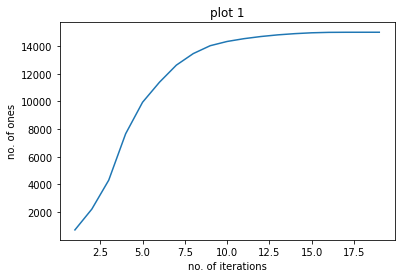

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(x_p,y_p)
plt.xlabel("no. of iterations")
plt.ylabel("no. of ones")
plt.title("plot 1")
plt.show()
plt.savefig('plot1.jpg')

In [ ]:
y_change=[]
y_change.append(y_p[0])
for k in range(1,len(y_p)):
  y_change.append(y_p[k]-y_p[k-1])

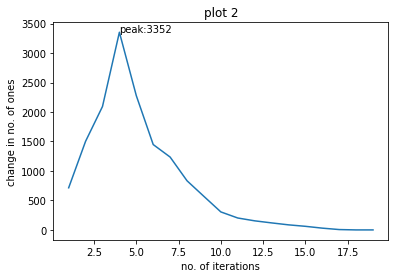

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(x_p,y_change)
plt.xlabel("no. of iterations")
plt.ylabel("change in no. of ones")
plt.title("plot 2")
plt.text(x_p[y_change.index(max(y_change))], max(y_change), r'peak:'+str(max(y_change)), fontsize=10)
plt.show()
plt.savefig('plot2.jpg')